In [1]:
import numpy as np
import pandas as pd
import networkx as nx
from scipy import sparse
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_mutual_info_score as AMS
from sklearn.metrics import normalized_mutual_info_score as NMS
from sklearn.cluster import SpectralClustering
import community as community_louvain

import matplotlib.cm as cm

In [2]:
def read_graph(path):
 # Load the graph from edgelist
 edgelist = pd.read_table(path,
 header=None, names=["source", "target"])
 edgelist["label"] = "cites"
 numNodes = len(edgelist["source"].unique())
 graph = nx.from_pandas_edgelist(edgelist, edge_attr="label")
 # nx.set_node_attributes(graph, "paper", "label")
 # Load the features and subject for the nodes

 feature_names = ["w_{}".format(ii) for ii in range(1433)]
 column_names = feature_names + ["subject"]
 node_data = pd.read_table("./data/cora/cora.content",
 header=None, names=column_names)
 return graph, node_data, feature_names, numNodes

 ##### Linear scale

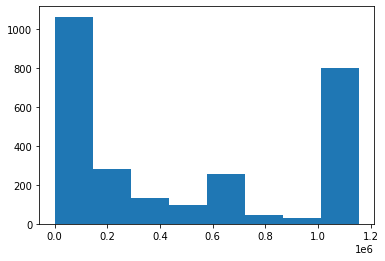

In [3]:
graph, node_data, feature_names, numNodes = read_graph("./data/cora/cora.cites")

# plt.hist([ x[1] for x in list(nx.degree(graph))])
hist, bins, _ = plt.hist([x[0] for x in list(nx.degree(graph))], bins=8)
plt.show()

##### Logaritmic scale

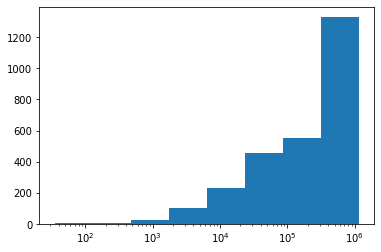

In [45]:
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist([x[0] for x in list(nx.degree(graph))], bins=logbins)
plt.xscale('log')
plt.show()

#### Connected components of Core graph + parameters
- note: The graph is not fully connected

In [62]:
conn_comp = nx.connected_components(graph)
print("Number of connected components:")
noComp = nx.number_connected_components(graph)
print(noComp)
# for comp in conn_comp:
#     print(comp)
#     print("Number of nodes:")
#     print(len(comp))
print("Max component length: ")
largest_cc = max(conn_comp, key=len)
print(len(largest_cc))
# print("Diameter:")
# diame = nx.diameter(graph)
# print(diame)

print("Avg clustering coef")
avg_coef = nx.cluster.average_clustering(graph)
print(avg_coef)

Number of connected components:
78
Max component length: 
2485
Avg clustering coef
0.2406732985019372


## Task 2

-   Random graph

In [66]:
n = numNodes
print(n)
p = 0.5
k = 3
graph_rnd = nx.gnp_random_graph(n,p)
graph_watts = nx.watts_strogatz_graph(n,k,p)


1565


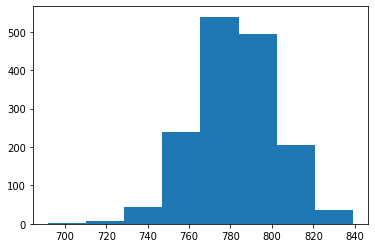

In [76]:
hist, bins, _ = plt.hist([x[1] for x in list(nx.degree(graph_rnd))], bins=8)
plt.show()

##### Logaritmic scale

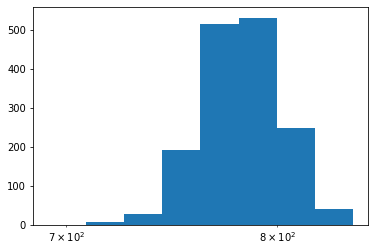

In [77]:
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist([x[1] for x in list(nx.degree(graph_rnd))], bins=logbins)
plt.xscale('log')
plt.show()

In [79]:
conn_comp = nx.connected_components(graph_rnd)
print("Number of connected components:")
noComp = nx.number_connected_components(graph_rnd)
print(noComp)
# for comp in conn_comp:
#     print(comp)
#     print("Number of nodes:")
#     print(len(comp))
print("Max component length: ")
largest_cc = max(conn_comp, key=len)
print(len(largest_cc))
print("Diameter:")
diame = nx.diameter(graph_rnd)
print(diame)

print("Avg clustering coef")
avg_coef = nx.cluster.average_clustering(graph_rnd)
print(avg_coef)

Number of connected components:
1
Max component length: 
1565
Diameter:
2
Avg clustering coef
0.5001115484458698


-   Watts graph

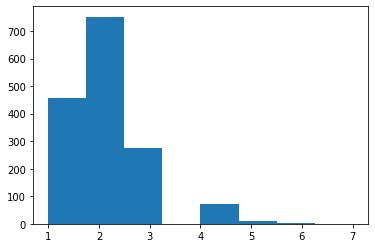

In [71]:
hist, bins, _ = plt.hist([x[1] for x in list(nx.degree(graph_watts))], bins=8)
plt.show()

##### Logaritmic scale

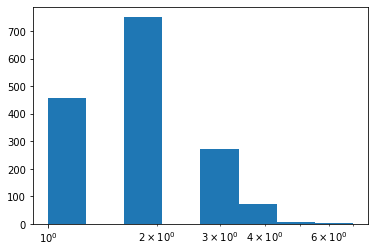

In [73]:
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist([x[1] for x in list(nx.degree(graph_watts))], bins=logbins)
plt.xscale('log')
plt.show()

In [83]:
conn_comp = nx.connected_components(graph_watts)
print("Number of connected components:")
noComp = nx.number_connected_components(graph_watts)
print(noComp)
# for comp in conn_comp:
#     print(comp)
#     print("Number of nodes:")
#     print(len(comp))
print("Max component length: ")
largest_cc = max(conn_comp, key=len)
print(len(largest_cc))
# print("Diameter:")
# diame = nx.diameter(graph_watts)
# print(diame)

print("Avg clustering coef")
avg_coef = nx.cluster.average_clustering(graph_watts)
print(avg_coef)


Number of connected components:
4
Max component length: 
935
Avg clustering coef
0.0022668492317054617


## Task 4  ---- ASK ----

In [106]:
partition = community_louvain.best_partition(graph)
print(partition)
# draw the graph
# pos = nx.spring_layout(graph)
# # color the nodes according to their partition
# cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
# nx.draw_networkx_nodes(graph, pos, partition.keys(), node_size=40,
#                        cmap=cmap, node_color=list(partition.values()))
# nx.draw_networkx_edges(graph, pos, alpha=0.5)
# plt.show()
mod = community_louvain.modularity(partition,graph)
values = [[partition.get(node)] for node in graph.nodes()]
# nx.draw_spring(graph, cmap= plt.get_cmap('jet'), node_color= values, node_size = 30, with_labels = False)
# plt.show()
print(mod)
print(values)
print(len(set(values)))
AMS()
NMS()

{35: 17, 1033: 17, 103482: 2, 103515: 17, 1050679: 2, 1103960: 17, 1103985: 17, 1109199: 17, 1112911: 17, 1113438: 17, 1113831: 17, 1114331: 17, 1117476: 17, 1119505: 17, 1119708: 17, 1120431: 3, 1123756: 17, 1125386: 4, 1127430: 17, 1127913: 17, 1128204: 17, 1128227: 17, 1128314: 17, 1128453: 5, 1128945: 17, 1128959: 6, 1128985: 17, 1129018: 17, 1129027: 17, 1129573: 6, 1129683: 17, 1129778: 17, 1130847: 17, 1130856: 17, 1131116: 17, 1131360: 17, 1131557: 17, 1131752: 17, 1133196: 17, 1133338: 17, 1136814: 17, 1137466: 17, 1152421: 17, 1152508: 17, 1153065: 17, 1153280: 17, 1153577: 17, 1153853: 17, 1153943: 17, 1154176: 17, 1154459: 17, 116552: 17, 12576: 6, 128540: 17, 132806: 17, 135130: 6, 141342: 17, 141347: 17, 148170: 17, 15670: 17, 1688: 17, 175291: 7, 178727: 17, 18582: 17, 190697: 17, 190706: 17, 1956: 4, 197054: 17, 198443: 17, 198653: 4, 206371: 17, 210871: 17, 229635: 17, 231249: 17, 248425: 17, 249421: 12, 254923: 17, 259701: 17, 259702: 17, 263279: 17, 263498: 17, 26520

TypeError: adjusted_mutual_info_score() missing 2 required positional arguments: 'labels_true' and 'labels_pred'

## Task 6

In [6]:
print(node_data)
print(feature_names)
spectral_clustering = SpectralClustering(affinity='precomputed')
spectral_clustering.fit()

         w_0  w_1  w_2  w_3  w_4  w_5  w_6  w_7  w_8  w_9  ...  w_1424  \
31336      0    0    0    0    0    0    0    0    0    0  ...       0   
1061127    0    0    0    0    0    0    0    0    0    0  ...       0   
1106406    0    0    0    0    0    0    0    0    0    0  ...       0   
13195      0    0    0    0    0    0    0    0    0    0  ...       0   
37879      0    0    0    0    0    0    0    0    0    0  ...       0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...     ...   
1128975    0    0    0    0    0    0    0    0    0    0  ...       0   
1128977    0    0    0    0    0    0    0    0    0    0  ...       0   
1128978    0    0    0    0    0    0    0    0    0    0  ...       0   
117328     0    0    0    0    1    0    0    0    0    0  ...       0   
24043      0    0    0    0    0    0    0    0    0    0  ...       0   

         w_1425  w_1426  w_1427  w_1428  w_1429  w_1430  w_1431  w_1432  \
31336         0       1       0     

TypeError: fit() missing 1 required positional argument: 'X'